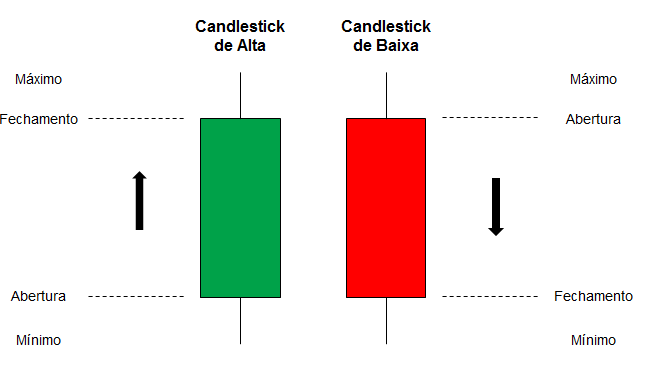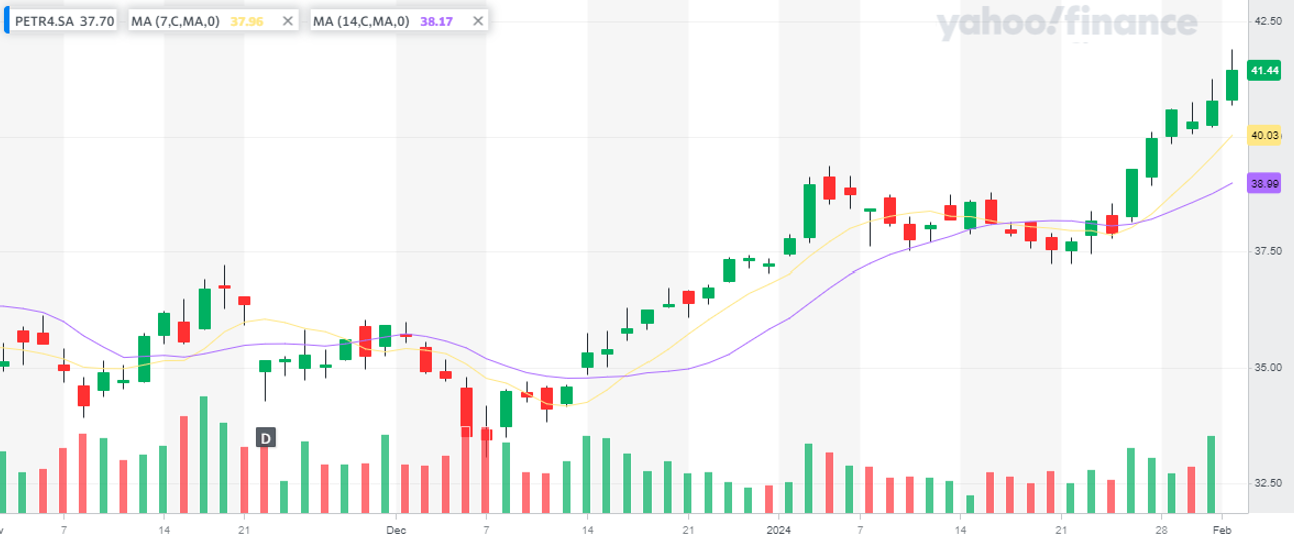

# Iniciando o Código

Fonte: https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/


In [ ]:
#!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Baixando dados


In [ ]:
dados = yf.download('PETR4.SA', start='2023-01-01', end ='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados.columns =['Abertura', 'Maxima','Minima', 'Fechamento','Ajuste_Fechamento', 'Volume' ]


In [ ]:
dados


,Abertura,Maxima,Minima,Fechamento,Ajuste_Fechamento,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
dados =dados.rename_axis('Data')
dados


,Abertura,Maxima,Minima,Fechamento,Ajuste_Fechamento,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


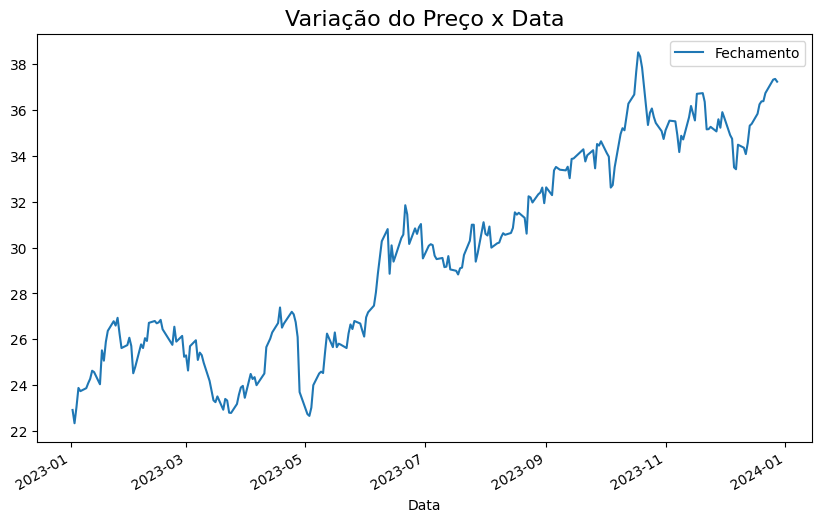

In [ ]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title ('Variação do Preço x Data', fontsize=16 )
plt.legend(['Fechamento'])



## Preparando a base para Candles

In [ ]:
import pandas as pd
import matplotlib.dates as mdates

# Assuming 'dados' is a DataFrame with a column named 'Fechamento'
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de Data
df['Data'] = df.index

# Convertendo as datas para o formato numérico do matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

df


,Abertura,Maxima,Minima,Fechamento,Ajuste_Fechamento,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613497,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030733,58130000,19369.0


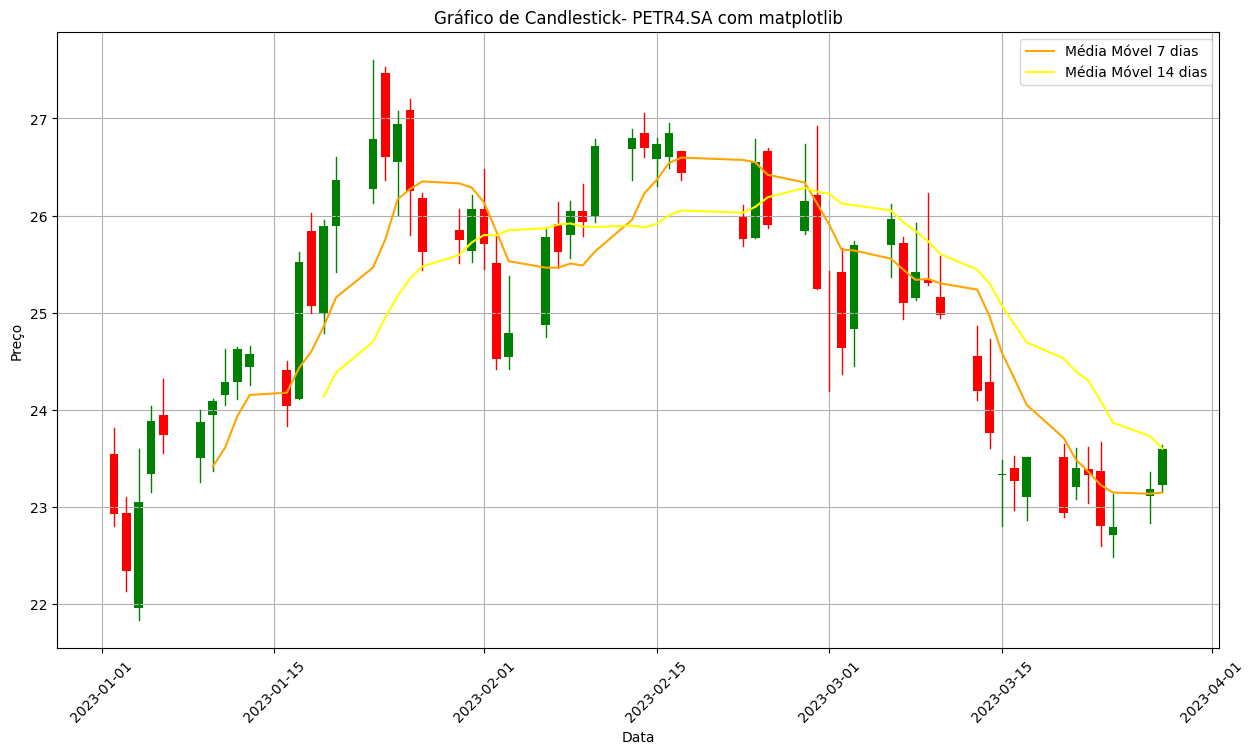

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))

# Definir a largura dos Candles
width = 0.7

for i in range(len(df)):
    # Determinar a cor do Candle
    # Se o preço de fechamento for maior do que a de abertura, o candle é verde (a ação valorizou neste dia)
    # Se for menor, o candle é vermelho (a ação se desvalorizou)
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do Candle (Mecha)
    # Essa linha mostra os preços máximos (topo da linha) e mínimo (base da linha) do dia.
    # Usamos o 'ax.plot' para desenhar a linha vertical
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data) e [df['Minimo'].iloc[i], df['Maximo'].iloc[i]] define o Valor Máximo que foi atingido
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minima'].iloc[i], df['Maxima'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7']= df['Fechamento'].rolling(window=7).mean()
df['MA14']= df['Fechamento'].rolling(window=14).mean()

#Plotando as médias móveis

ax.plot(df['Data'],df['MA7'], color='orange', label='Média Móvel 7 dias') # Média de 7 dias
ax.plot(df['Data'],df['MA14'], color='yellow', label='Média Móvel 14 dias') # Média de 14 dias

#Adicionando legendas para as médias móveis
ax.legend()


#Formatando o eixo x para mostrar as datas
#Configurando o formato de data ea rotação para melhor legibilidade
ax.xaxis_date() #Este método é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)


#Adicionando Títulos e rótulos para eixos x e y
plt.title("Gráfico de Candlestick- PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

#Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

#Exibindo o Gráfico
plt.show()



### Criando SubPlates


In [ ]:
"""
Primeiro criamos uma figura que contará nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização .
Aqui temos dois subplots : um para o gráfico de Candlestick e outro para valores de transações.


"""

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2,0.7] )

"""
No gráfico de Candlesticks , cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, másimo e mínimo . Vamos adicionar este
gráfico a nossa figura.

"""

#Adicionando o Gráfico Candlestick

fig.add_trace(go.Candlestick(x=df.index,
                              open=df['Abertura'],
                              high=df['Maxima'],
                              low=df['Minima'],
                              close=df['Fechamento'],
                              name= 'Clandestick'),
                              row=1,col=1
                              )


#Adicionando as mídias móveis
#Adicionando também mídias móveis ao mesmo subplot para analise de tendencias.

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name = "MA7 - Média Móvel 7 dias"),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name = "MA14 - Média Móvel 14 dias"),
                         row=1, col=1)

# Adicionando o Gráfico de Barras para o Volume
# Em seguida criaremos um gráfico de barras para o volume de transações, que nos dá uma idéia de atividade de negociação daquele dia.

fig.add_trace(go.Bar(x=df.index,
                         y=df['Volume'],
                         name = "Volume"),
                         row=2, col=1)

#Atualizando o Layout
#Finalmente configuramos o Layout da figura , ajustando títulos , formatos de eixos e outras configurações para tornar o gráfico mais claro.

fig.update_layout(yaxis_title ='Preço',
                  xaxis_rangeslider_visible=False, #Desativa o range Slider
                  width=1100, height=600
                  )

#Mostrando o resultado

fig.show()




### Api Mágica

In [ ]:
dados = yf.download('PETR4.SA', start='2023-01-01', end ='2023-12-31')


[*********************100%%**********************]  1 of 1 completed


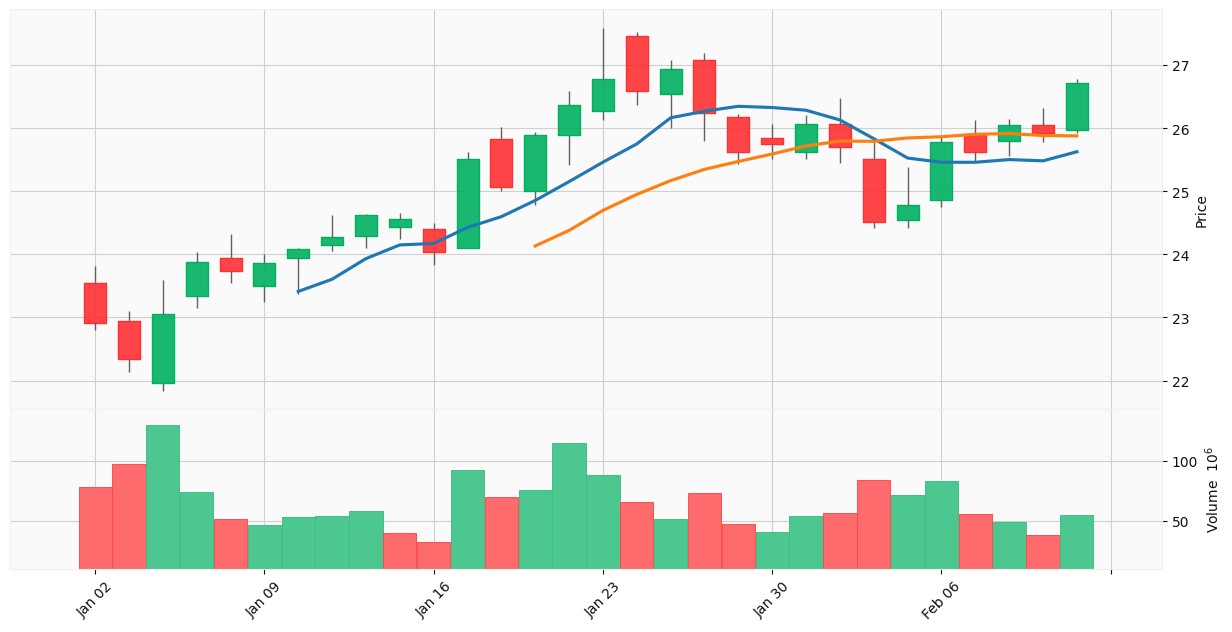

In [ ]:
mpf.plot(dados.head(30), type ='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo' )

In [ ]:
import pandas as pd
import plotly.express as px

# Create a DataFrame with the data
data = {
    'Ativo': ['USIM5', 'CMIN3', 'PETR3', 'SUZB3', 'PETR4', 'VALE3', 'MULT3', 'CSNA3', 'YDUQ3', 'UGPA3', 'ARZZ3', 'BBDC4', 'PCAR3', 'ITSA4', 'CSAN3', 'JBSS3', 'MGLU3', 'BBDC3', 'CPLE6'],
    'Variação em Reais': [241.88972543, 177.5159703, 2140.05939353, 722.94628271, 3103.13629122, 4762.92699525, 117.73268008, 143.22099146, 72.29583899, 388.70522396, 41.02179209, 822.14833641, 6340.91622, 373.85399488, 127.22965318, 156.57328543, 28493.61927, 74.01961005, 32069.7895],
    'Empresa': ['Usiminas', 'CSN Mineração', 'Petrobras', 'Suzano', 'Petrobras', 'Vale', 'Multiplan', 'Siderúrgica Nacional', 'YDUQS', 'Ultrapar', 'Arezzo', 'Banco Bradesco', 'Grupo Pão de Açúcar', 'Itaúsa', 'Cosan', 'JBS', 'Magazine Luiza', 'Banco Bradesco', 'Copel']
}

df = pd.DataFrame(data)

# Filter the DataFrame to include only the assets that had a positive variation
positive_variation_df = df[df['Variação em Reais'] > 0]

# Create the bar chart using Plotly
fig = px.bar(positive_variation_df, x='Ativo', y='Variação em Reais', color='Empresa',
             title='Crescimento das Ações que mais subiram')

fig.show()